### AIM:
> * To design a DNN with minimum accuracy of 99.2 %

In [0]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

* Loading the data-set

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

* Reshaping and Normalization

In [23]:
No_of_pixels=x_train.shape[1]*x_train.shape[2]

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train/=255
x_test/=255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


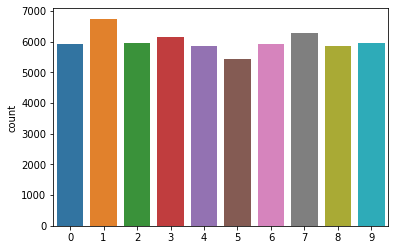

In [24]:
g=sns.countplot(y_train)

*  Splitting the dataset into training, testing and validation datasets

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

* Data Augmentation

In [0]:
data_generator=ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)
data_generator.fit(x_train)

* The Hyper-Parameters

In [0]:
No_epochs=30
input_shape=(28,28,1)
learning_rate=0.5
dropout_rate=0.3
batch_size=128

* The Structure of the Deep Neural Network/ The Architecture of the DNN

In [28]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               709950    
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1510      
Total params: 711,740
Trainable params: 711,740
Non-trainable params: 0
________________________________________________

* Training the DNN

In [29]:
history = model.fit_generator(data_generator.flow(x_train,y_train, batch_size=batch_size),epochs =No_epochs, validation_data = (x_val,y_val))

Epoch 1/30





422/422 [==============================] - 26s 63ms/step - loss: 0.5802 - acc: 0.8204 - val_loss: 0.1439 - val_acc: 0.9568
Epoch 2/30
422/422 [==============================] - 12s 29ms/step - loss: 0.2499 - acc: 0.9236 - val_loss: 0.1044 - val_acc: 0.9703
Epoch 3/30
422/422 [==============================] - 12s 29ms/step - loss: 0.1952 - acc: 0.9421 - val_loss: 0.0824 - val_acc: 0.9755
Epoch 4/30
422/422 [==============================] - 12s 29ms/step - loss: 0.1655 - acc: 0.9500 - val_loss: 0.0763 - val_acc: 0.9763
Epoch 5/30
422/422 [==============================] - 12s 29ms/step - loss: 0.1470 - acc: 0.9563 - val_loss: 0.0901 - val_acc: 0.9700
Epoch 6/30
422/422 [==============================] - 12s 29ms/step - loss: 0.1393 - acc: 0.9573 - val_loss: 0.0568 - val_acc: 0.9808
Epoch 7/30
422/422 [==============================] - 12s 29ms/step - loss: 0.1329 - acc: 0.9599 - val_loss: 0.0636 - val_acc: 0.9798
Epoch 8/30
422/422 [==============================] - 12s

* Plotting the loss v/s epochs graph

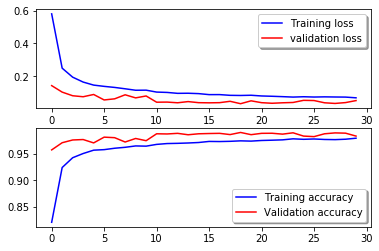

In [30]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

* Evaluating the accuracy

In [31]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/step


[0.05034995417597238, 0.9833]

* Saving the model

* Random Testing 